<a href="https://colab.research.google.com/github/erfanera/SlumImprovment/blob/main/roadshadow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python numpy


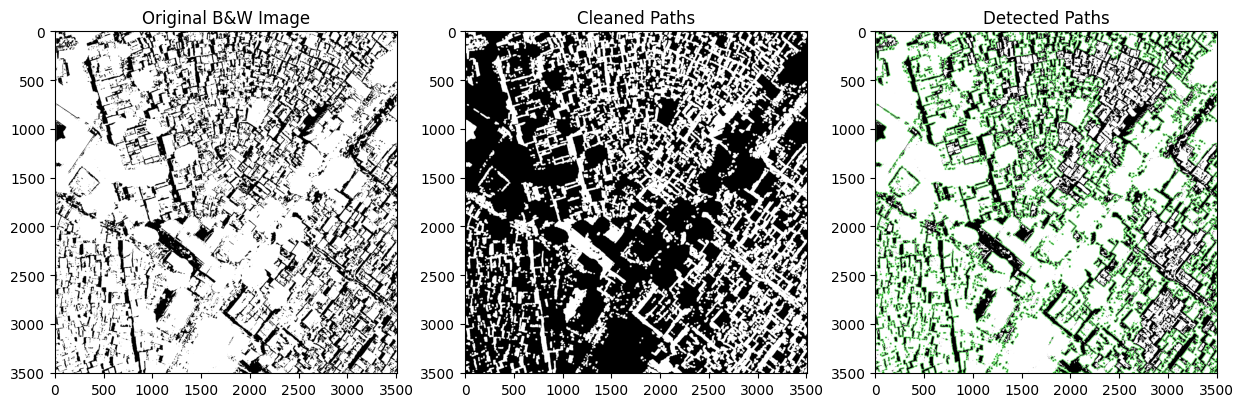

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your black-and-white image where shadows are black
image_path = '/root/ground road.png'  # Update this to your image's file path
bw_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Assuming black (low intensity) represents shadows in your image
# You may need to invert the image if white represents shadows
# Uncomment the following line to invert the image if necessary
# bw_image = 255 - bw_image

# Identify potential paths by isolating dark (black) regions
# Since your image is already a mask, this might be unnecessary,
# but you can apply additional thresholds if needed to refine it:
_, paths_mask = cv2.threshold(bw_image, 127, 255, cv2.THRESH_BINARY_INV)

# Morphological operations to clean up noise and enhance path structures
kernel = np.ones((5, 5), np.uint8)  # You can adjust the kernel size as needed
cleaned_paths = cv2.morphologyEx(paths_mask, cv2.MORPH_OPEN, kernel)
cleaned_paths = cv2.dilate(cleaned_paths, kernel, iterations=2)  # Increase path width

# Optionally, find contours (which could represent paths)
contours, _ = cv2.findContours(cleaned_paths, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image for visualization
contour_img = cv2.cvtColor(bw_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR to draw colored contours
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)  # Draw contours in green

# Show the original and processed images
plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.imshow(bw_image, cmap='gray')
plt.title('Original B&W Image')
plt.subplot(1, 3, 2)
plt.imshow(cleaned_paths, cmap='gray')
plt.title('Cleaned Paths')
plt.subplot(1, 3, 3)
plt.imshow(contour_img)
plt.title('Detected Paths')
plt.show()
